In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
import scipy.stats as stats

## <font color=pickle> Reading the data into dataframe

In [12]:
df=pd.read_csv("data\heart_disease_dataset.csv")

In [13]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1.0,2.0,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0.0,1.0,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1.0,1.0,120,NaN,0,1,178.0,0,0.8,2,0,2,1
4,57,0.0,0.0,120,354.0,0,1,NaN,1,0.6,2,0,2,1


## <font color = pickle> Checking for Column Names

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## <font color="pickle"> Checking for data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       283 non-null    float64
 2   cp        290 non-null    float64
 3   trestbps  303 non-null    int64  
 4   chol      285 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   281 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [16]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        150
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

- Looks like certain categorical variables are encoded in numerical values and their datatype is misrepresented. So we will move it's datatype to object.

In [17]:
col=['sex','cp','fbs','restecg','exang','thal','target']
for var in col:
    print(df[var].value_counts())

sex
1.0    194
0.0     89
Name: count, dtype: int64
cp
0.0    135
2.0     84
1.0     50
3.0     21
Name: count, dtype: int64
fbs
0    258
1     45
Name: count, dtype: int64
restecg
1    152
0    147
2      4
Name: count, dtype: int64
exang
0    204
1     99
Name: count, dtype: int64
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64
target
1    165
0    138
Name: count, dtype: int64


In [18]:
col=['sex','cp','fbs','restecg','exang','thal','target']
for var in col:
    df[var]=df[var].astype('object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       283 non-null    object 
 2   cp        290 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      285 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   281 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 33.3+ KB


## <font color=pickle> Checking for Data Distribution

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,285.0,246.031579,52.756373,126.0,211.0,240.0,275.0,564.0
thalach,281.0,149.249110,23.268507,71.0,132.0,152.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


## <font color=pickle> Checking for Missing Values

In [21]:
df.isna().mean()*100

age         0.000000
sex         6.600660
cp          4.290429
trestbps    0.000000
chol        5.940594
fbs         0.000000
restecg     0.000000
thalach     7.260726
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
target      0.000000
dtype: float64

- Variables like sex,cp,chol,thalaach are the variables that contain missing data. We will treat them accordingly.
- Chol,thalaach missing data can be imputed using Median imputation since they contain more than 5% of missing data.
- Sex, cp variables missing data can be imputed by adding Missing category for them since they contain more than 5% of missing data.

## <font color=pickle> Checking for duplicate rows

In [22]:
dups=df.duplicated()
print(dups.any())


True


- Looks like there are duplicate rows in the data. We need to include a function in our pipeline to remove them.

## <font color=pickle> Checking for data distributions

In [28]:
discrete=[x for x in df.columns if df[x].dtype!='object' and df[x].nunique() < 10]
continuous=[x for x in df.columns if df[x].dtype!='object' and x not in discrete]
categorical=[x for x in df.columns if df[x].dtype=='object' and x not in 'target']

In [29]:
discrete

['slope', 'ca']

In [30]:
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [31]:
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [32]:
def continuous_plots(X,var):
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    sns.histplot(X[var])
    plt.title("Histogram")

    plt.subplot(1,3,2)
    sns.boxplot(X[var])
    plt.title("Box plot")

    plt.subplot(1,3,3)
    stats.probplot(X[var],dist='norm',plot=plt)
    plt.title("Q-Q plot")

    plt.show()

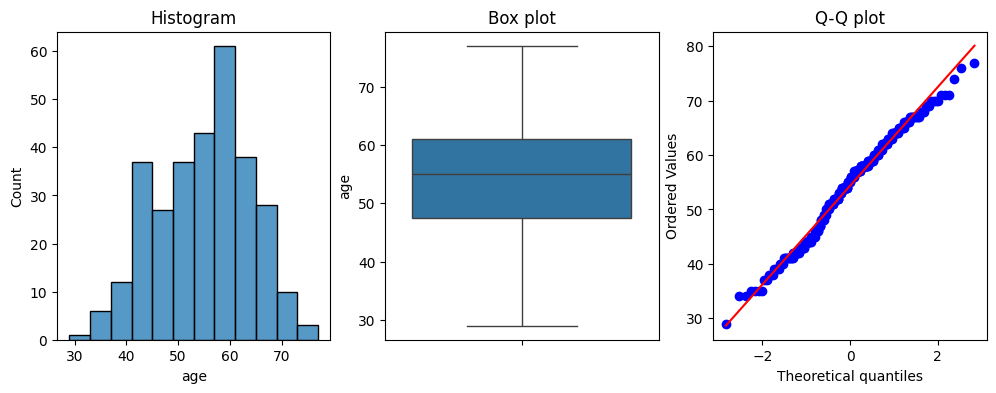

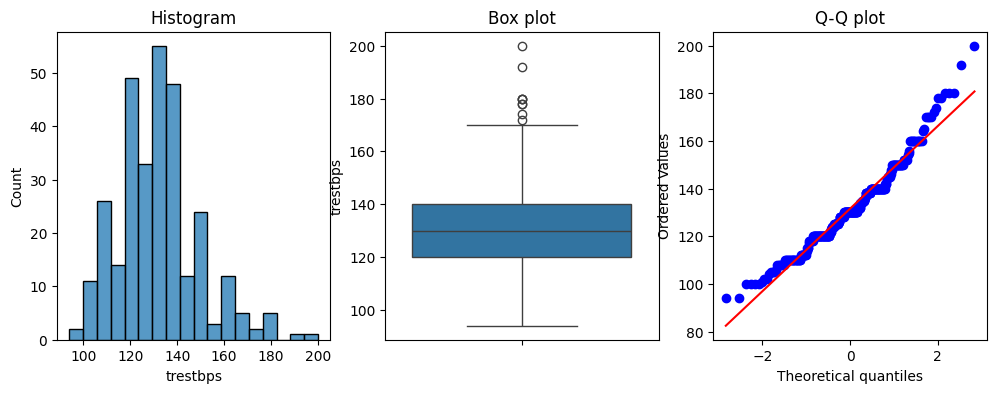

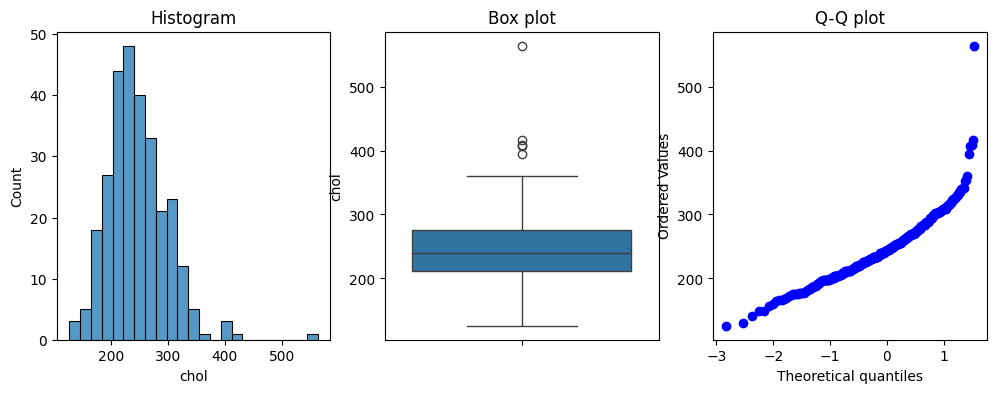

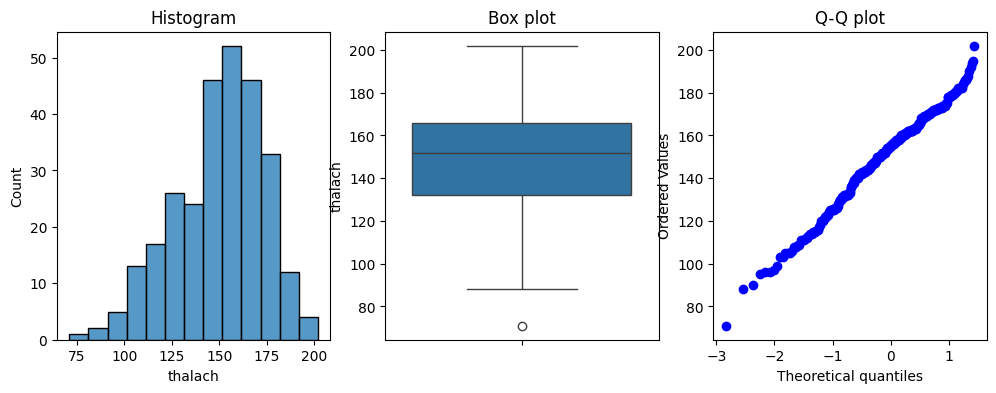

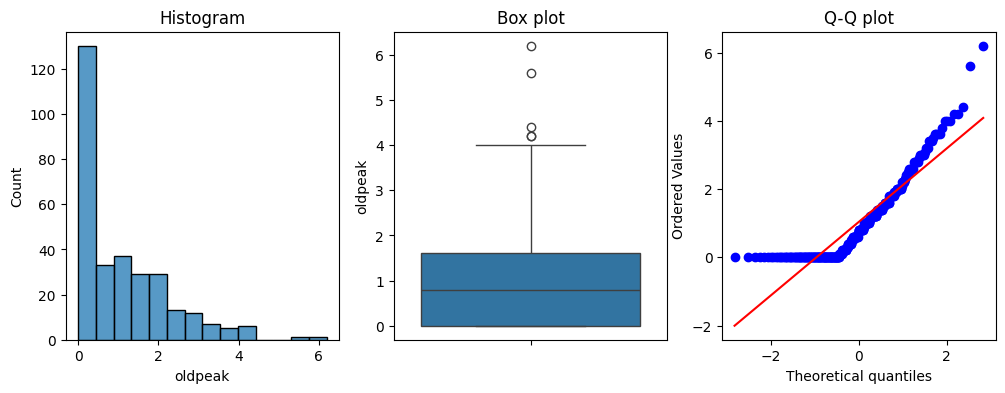

In [33]:
for var in continuous:
    continuous_plots(df,var)

- Variables like thalaach, chol,trestbps,oldpeak are skewed and hence we need to transform them.

In [34]:
def cat_plot(X,var):
    cat_freq=X[var].value_counts(normalize=True)*100
    fig=cat_freq.sort_values(ascending=True).plot.bar()
    fig.axhline(y=5,color="red")
    fig.set_title("Identfying rare categories")
    fig.set_xlabel(var)
    fig.set_ylabel("Frequencies")
    plt.show()





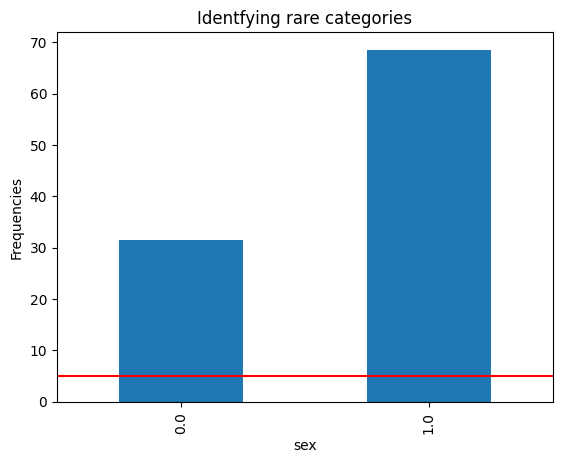

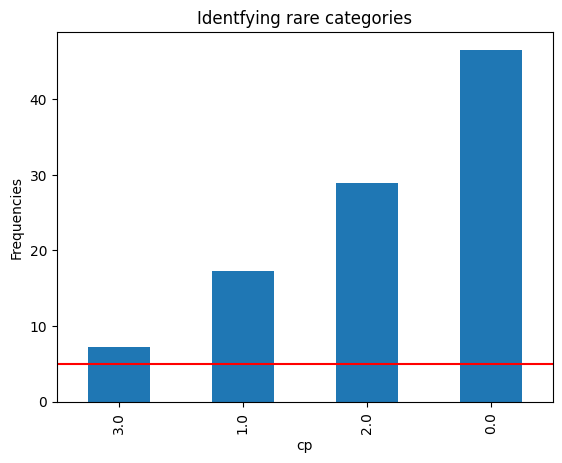

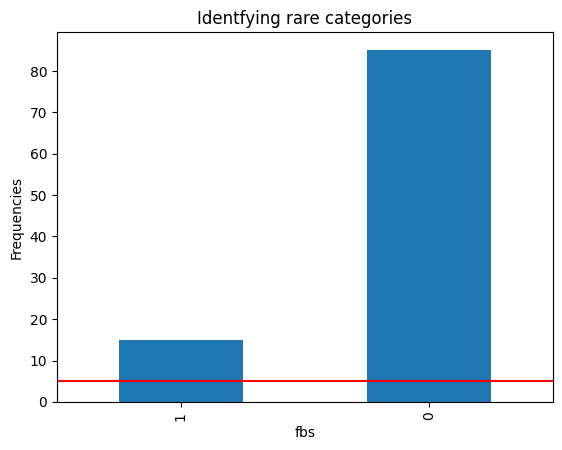

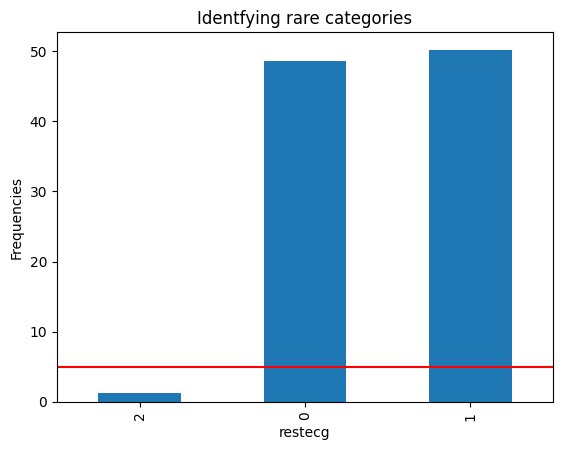

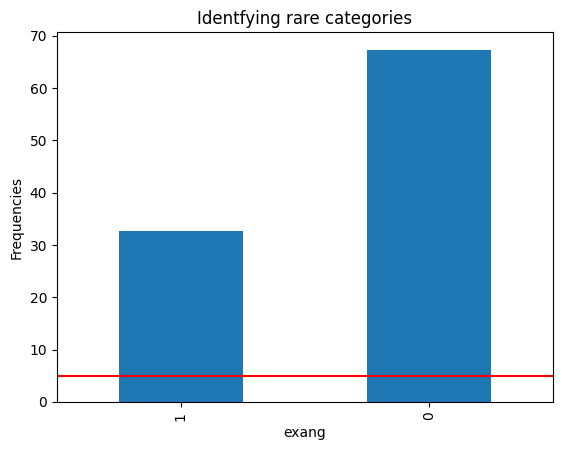

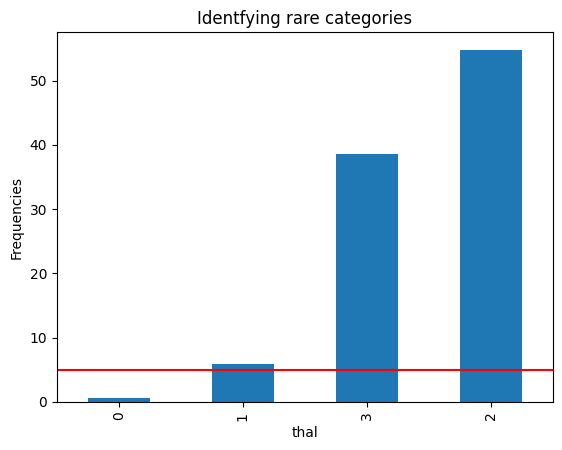

In [35]:
for var in categorical:
    cat_plot(df,var)

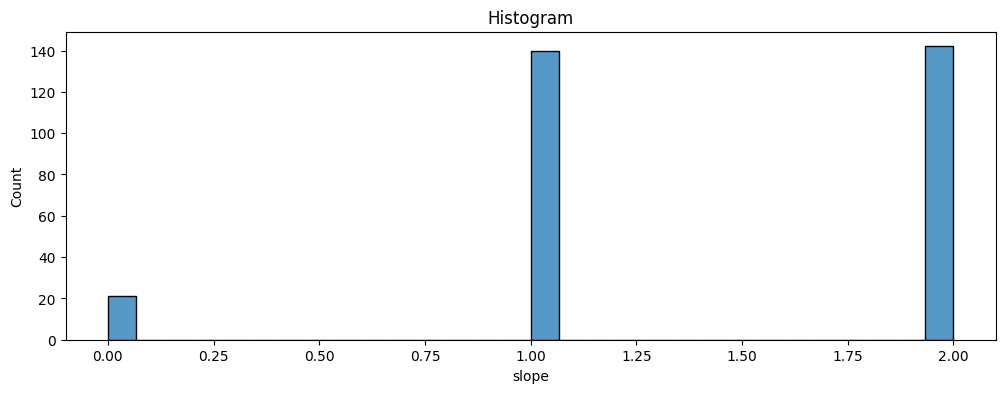

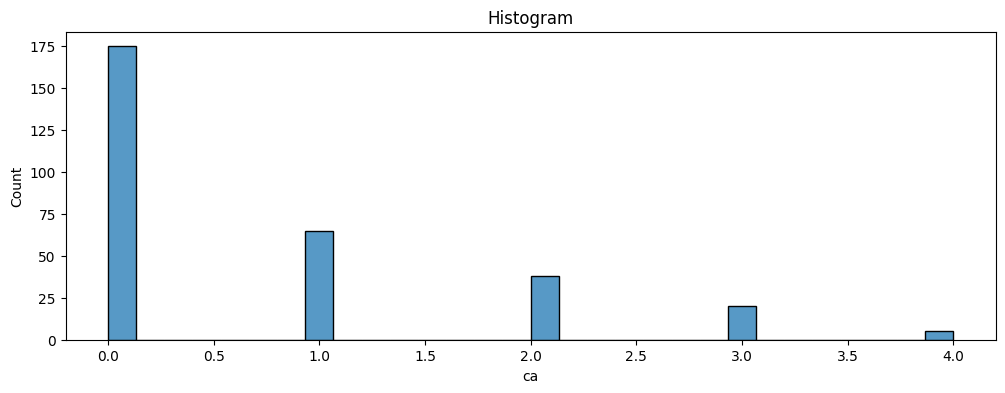

In [37]:
# histograms for discrete variables
for var in discrete:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 1, 1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram')

- thal, ca, restecg are having rare categories. So we have to use rarelevelencoder to address this issue

## <font color=pickle> Visualizing Relationship between Variables

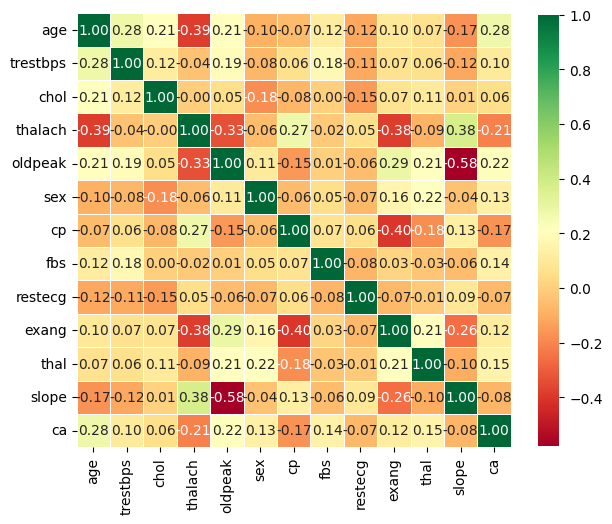

In [36]:
corr=df[continuous+categorical+discrete].corr().round(2)
top_corr_features=corr.index
plt.figure(figsize=(7,7))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn',square=True,linewidths=0.5,cbar_kws={"shrink": .80},fmt='.2f')
plt.show()

- There are no signs of multicollinearity.

## <font color = pickle> Conclusion From EDA

- There are missing values in the data and hence we will use suitable imputation methods for them.
- Since there are more than 5% of missing data we will use Median imputation method for filling data for numerical variables.
- Similarly we will use categorical Imputer for categorical variables with missing data.
- Trestbps, thalaach, chol,oldpeak are skewed in their distributions so we will use log transformations to make them close to normal.
- Thal is having rare categories. so we will use rare label encoder to address this issue.
- We will use one hot encoding for categorical variables except for cp and restecg variables and scale all continuous variables using Standard Scaler.
- We will use label encoder for cp and restecg variables.
- ca is discrete variable and can take only four values. One seems to be the most frequent value. The median is also one. So we can impute missing values using median.
- slope is discrete variable and can take only three values. two and three seems to be the most frequent value. The median is also two. So we can impute missing values using median.